In [1]:
import numpy as np

class MyPCA:
    def __init__(self, n_components):
        self.n_components=n_components
        self.dec=None
    def fit(self, X):
        X_mean=np.mean(X,axis=0)
        X=(X-X_mean).T@(X-X_mean)
        if self.dec == None:
            self.dec=np.linalg.eig(X)
            self.components_=self.dec[1]
    def transform(self, X):
        return X@self.dec[1][:,:self.n_components]@self.dec[1][:,:self.n_components].T

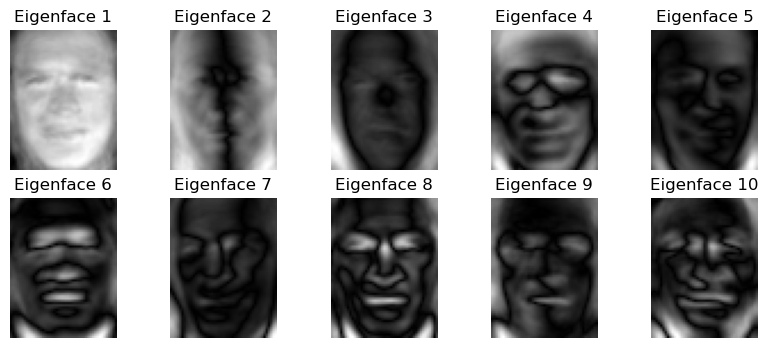

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import MinMaxScaler,StandardScaler

lfw_dataset = fetch_lfw_people(min_faces_per_person=70)
X = lfw_dataset.data
pca = MyPCA(n_components=100)
pca.fit(X)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.abs(pca.components_[:, i].reshape((62, 47))), cmap='gray')
    ax.set_title('Eigenface {}'.format(i+1))
    ax.axis('off')
plt.show()

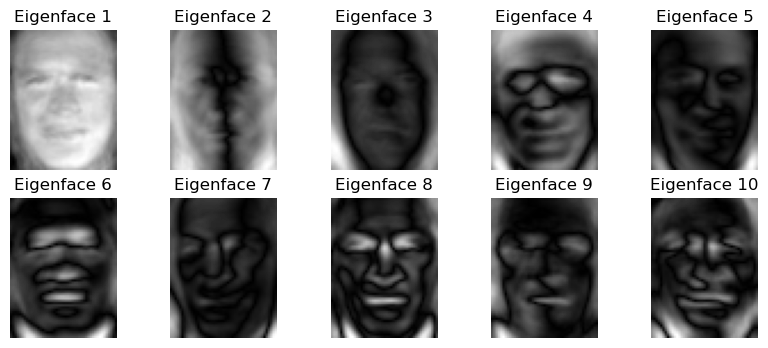

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

lfw_dataset = fetch_lfw_people(min_faces_per_person=70)
X = lfw_dataset.data

pca1 = PCA(n_components=100)
pca1.fit(X)


fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.abs(pca1.components_[i].reshape((62, 47))), cmap='gray')
    ax.set_title('Eigenface {}'.format(i+1))
    ax.axis('off')
plt.show()